In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df_train = pd.read_excel('Flight_Price_Train.xlsx')

In [3]:
df_test = pd.read_excel('Flight_Price_Test.xlsx')

# Task 1: Perform Feature Engineering 
### a) Perform basic exploration like checking for top 5 records, shape, statistical info, duplicates, Null values etc. 


In [4]:
df_train.shape

(10683, 11)

In [5]:
df_train.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302

In [6]:
df_train.tail()

Airline Date_of_Journey    Source Destination  \
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time Arrival_Time Duration Total_Stops  \
10678              CCU → BLR    19:55        22:25   2h 30m    non-stop   
10679              CCU → BLR    20:45        23:20   2h 35m    non-stop   
10680              BLR → DEL    08:20        11:20       3h    non-stop   
10681              BLR → DEL    11:30        14:10   2h 40m    non-stop   
10682  DEL → GOI → BOM → COK    10:55        19:15   8h 20m     2 stops   

      Additional_Info  Price  
10678         No info   4107  
10679         No info   4145  
10680         No info   7229  
10681         No info  12648  
10682         No info  11753

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
df_train.dropna(inplace=True)

In [9]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
df_train.duplicated().sum()

220

In [11]:
df_train.drop_duplicates(keep = 'first',inplace=True)

In [12]:
df_train.duplicated().sum()

0

### b) Extract Date, Month, Year from Date of Journey column

In [13]:
# day
df_train['day'] = pd.to_datetime(df_train.Date_of_Journey, format = "%d/%m/%Y").dt.day

In [14]:
# month
df_train["month"] = pd.to_datetime(df_train.Date_of_Journey, format = "%d/%m/%Y").dt.month

In [15]:
# year
df_train['Year'] = pd.to_datetime(df_train.Date_of_Journey,format = "%d/%m/%Y").dt.year

In [16]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.

df_train.drop(["Date_of_Journey"], axis = 1, inplace = True)

#### Hours and Minutes from departure

In [17]:
# hours
df_train["Dep_hour"] = pd.to_datetime(df_train["Dep_Time"]).dt.hour

In [18]:
# minutes
df_train["Dep_min"] = pd.to_datetime(df_train["Dep_Time"]).dt.minute

In [19]:
# Now we can drop Dep_Time as it is of no use
df_train.drop(["Dep_Time"], axis = 1, inplace = True)

#### Hours and Minutes from Arrival

In [20]:
# Extracting Hours
df_train["Arrival_hour"] = pd.to_datetime(df_train.Arrival_Time).dt.hour

In [21]:
# Extracting Minutes
df_train["Arrival_min"] = pd.to_datetime(df_train.Arrival_Time).dt.minute

In [22]:
# Now we can drop Arrival_Time as it is of no use
df_train.drop(["Arrival_Time"], axis = 1, inplace = True)

#### Calculate Duration

In [23]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time

# Assigning and converting Duration column into list
duration = list(df_train["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [24]:
# Adding duration_hours and duration_mins list to train_data dataframe

df_train["Duration_hours"] = duration_hours
df_train["Duration_mins"] = duration_mins

In [25]:
df_train.head(2)

Airline    Source Destination                  Route Duration  \
0     IndiGo  Banglore   New Delhi              BLR → DEL   2h 50m   
1  Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR   7h 25m   

  Total_Stops Additional_Info  Price  day  month  Year  Dep_hour  Dep_min  \
0    non-stop         No info   3897   24      3  2019        22       20   
1     2 stops         No info   7662    1      5  2019         5       50   

   Arrival_hour  Arrival_min  Duration_hours  Duration_mins  
0             1           10               2             50  
1            13           15               7             25

## Task 2: Perform Exploratory Data Analysis (EDA) tasks
### a) Which airline is most preferred airline

In [26]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_train['Total_Stops_LabelEncoded'] = label_encoder.fit_transform(df_train['Total_Stops'])

In [27]:
df_train.head(2)

Airline    Source Destination                  Route Duration  \
0     IndiGo  Banglore   New Delhi              BLR → DEL   2h 50m   
1  Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR   7h 25m   

  Total_Stops Additional_Info  Price  day  month  Year  Dep_hour  Dep_min  \
0    non-stop         No info   3897   24      3  2019        22       20   
1     2 stops         No info   7662    1      5  2019         5       50   

   Arrival_hour  Arrival_min  Duration_hours  Duration_mins  \
0             1           10               2             50   
1            13           15               7             25   

   Total_Stops_LabelEncoded  
0                         4  
1                         1

In [28]:
preferred_airline = df_train.groupby('Airline').agg({'Price': 'mean', 'Duration_hours': 'mean', 'Total_Stops_LabelEncoded': 'mean'}).sort_values(by=['Price', 'Duration_hours', 'Total_Stops_LabelEncoded'], ascending=[True, True, True])

print(preferred_airline.head())

                Price  Duration_hours  Total_Stops_LabelEncoded
Airline                                                        
Trujet    4140.000000        3.000000                  0.000000
SpiceJet  4335.841718        2.463804                  3.273620
Air Asia  5590.260188        5.194357                  2.297806
IndiGo    5668.469897        4.225649                  2.419481
GoAir     5861.056701        4.371134                  1.896907


In [29]:
df_train.drop('Total_Stops_LabelEncoded',axis = 1, inplace = True)

### c) Find the majority of the flights take off from which source

In [30]:
source_counts = df_train['Source'].value_counts()

majority_source = source_counts.idxmax()

In [31]:
print("Majority of flights take off from:", majority_source)

Majority of flights take off from: Delhi


### d) Find maximum flights land in which destination

In [32]:
destination_counts = df_train['Destination'].value_counts()

max_landings_destination = destination_counts.idxmax()

In [33]:
print("Maximum flights land in destination:", max_landings_destination)

Maximum flights land in destination: Cochin


## Task 3: Compare independent features with Target feature to check the impact on price
### a) Which airline has the highest price.

In [34]:
highest_price_flight = df_train.loc[df_train['Price'].idxmax()]

In [35]:
result_df = pd.DataFrame({
    'Airline': [highest_price_flight['Airline']],
    'Price': [highest_price_flight['Price']]
})

print("Flight with the highest price:")
print('-'*30)
print(result_df)

Flight with the highest price:
------------------------------
                Airline  Price
0  Jet Airways Business  79512


In [36]:
# Display the details of the flight with the highest price
print("Flight with the highest price:")
print(highest_price_flight)

Flight with the highest price:
Airline            Jet Airways Business
Source                         Banglore
Destination                   New Delhi
Route                   BLR → BOM → DEL
Duration                         5h 40m
Total_Stops                      1 stop
Additional_Info          Business class
Price                             79512
day                                   1
month                                 3
Year                               2019
Dep_hour                              5
Dep_min                              45
Arrival_hour                         11
Arrival_min                          25
Duration_hours                        5
Duration_mins                        40
Name: 2924, dtype: object


### b) Check if the business class flights are high price or low and find only those flights which price is higher than 50k

In [37]:
df_train.Additional_Info.value_counts()

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [38]:
df_train['IsBusinessClass'] = df_train['Additional_Info'].apply(lambda x: 'Business class' in x)

In [39]:
# Find flights with a price higher than 50k
high_price_flights = df_train[df_train['Price'] > 50000]

In [40]:
# Display the details of flights with a price higher than 50k
print("Flights with a price higher than 50k:")
print(high_price_flights[['Airline', 'Price', 'IsBusinessClass']])

Flights with a price higher than 50k:
                    Airline  Price  IsBusinessClass
657    Jet Airways Business  52229            False
1478            Jet Airways  54826            False
2618            Jet Airways  54826            False
2924   Jet Airways Business  79512             True
5372   Jet Airways Business  62427             True
5439            Jet Airways  54826            False
9715   Jet Airways Business  52285            False
10364  Jet Airways Business  57209             True


In [41]:
df_train.drop('IsBusinessClass',axis = 1, inplace = True)

## Task 4: Perform encoding for the required features according to the data.

In [42]:
df_train.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [43]:
# Airline is Nominal Categorical data will perform OneHotEncoding
Airline = df_train[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first= True)
#Airline.head()

In [44]:
# Source is Nominal Categorical data will perform OneHotEncoding
Source = df_train[["Source"]]
Source = pd.get_dummies(Source, drop_first= True)
#Source.head()

In [45]:
# Destination is Nominal Categorical data will perform OneHotEncoding
Destination = df_train[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)
#Destination.head()

In [46]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

df_train.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [47]:
# Concatenate dataframe --> train_data + Airline + Source + Destination

data_train = pd.concat([df_train, Airline, Source, Destination], axis = 1)

In [48]:
data_train.head()

Airline    Source Destination Duration  Total_Stops  Price  day  month  \
0       IndiGo  Banglore   New Delhi   2h 50m            0   3897   24      3   
1    Air India   Kolkata    Banglore   7h 25m            2   7662    1      5   
2  Jet Airways     Delhi      Cochin      19h            2  13882    9      6   
3       IndiGo   Kolkata    Banglore   5h 25m            1   6218   12      5   
4       IndiGo  Banglore   New Delhi   4h 45m            1  13302    1      3   

   Year  Dep_hour  ...  Airline_Vistara Premium economy  Source_Chennai  \
0  2019        22  ...                                0               0   
1  2019         5  ...                                0               0   
2  2019         9  ...                                0               0   
3  2019        18  ...                                0               0   
4  2019        16  ...                                0               0   

   Source_Delhi  Source_Kolkata  Source_Mumbai  Destination_Cochin  \
0             0               0              0                   0   
1             0               1              0                   0   
2             1               0              0                   1   
3             0               1              0                   0   
4             0               0              0                   0   

   Destination_Delhi  Destination_Hyderabad  Destination_Kolkata  \
0                  0                      0                    0   
1                  0                      0                    0   
2                  0                      0                    0   
3                  0                      0                    0   
4                  0                      0                    0   

   Destination_New Delhi  
0                      1  
1                      0  
2                      0  
3                      0  
4                      1  

[5 rows x 35 columns]

In [49]:
data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [50]:
data_train.drop('Duration',axis = 1, inplace = True)

In [51]:
data_train.head()

Total_Stops  Price  day  month  Year  Dep_hour  Dep_min  Arrival_hour  \
0            0   3897   24      3  2019        22       20             1   
1            2   7662    1      5  2019         5       50            13   
2            2  13882    9      6  2019         9       25             4   
3            1   6218   12      5  2019        18        5            23   
4            1  13302    1      3  2019        16       50            21   

   Arrival_min  Duration_hours  ...  Airline_Vistara Premium economy  \
0           10               2  ...                                0   
1           15               7  ...                                0   
2           25              19  ...                                0   
3           30               5  ...                                0   
4           35               4  ...                                0   

   Source_Chennai  Source_Delhi  Source_Kolkata  Source_Mumbai  \
0               0             0               0              0   
1               0             0               1              0   
2               0             1               0              0   
3               0             0               1              0   
4               0             0               0              0   

   Destination_Cochin  Destination_Delhi  Destination_Hyderabad  \
0                   0                  0                      0   
1                   0                  0                      0   
2                   1                  0                      0   
3                   0                  0                      0   
4                   0                  0                      0   

   Destination_Kolkata  Destination_New Delhi  
0                    0                      1  
1                    0                      0  
2                    0                      0  
3                    0                      0  
4                    0                      1  

[5 rows x 31 columns]

## Task 5:  Build multiple model by using different algorithm such as Linear Regression, Decision Tree, and Random Forest etc. and check the performance of your model.

In [52]:
X = data_train.drop('Price',axis=1)
y = data_train['Price']

In [53]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [54]:
print(selection.feature_importances_)

[2.24774256e-01 1.43780946e-01 5.36100469e-02 0.00000000e+00
 2.43533478e-02 2.17626866e-02 2.72280424e-02 1.90602488e-02
 1.24521749e-01 1.77195340e-02 1.07270971e-02 1.45963238e-03
 1.40877575e-02 1.36315282e-01 6.85264771e-02 2.15296613e-02
 9.19368684e-04 2.61779085e-03 1.21068857e-04 5.27192434e-03
 7.99279076e-05 5.05949614e-04 9.82237426e-03 3.38035898e-03
 7.80812908e-03 8.95188939e-03 1.85449756e-02 6.44051891e-03
 5.65688399e-04 2.55132700e-02]


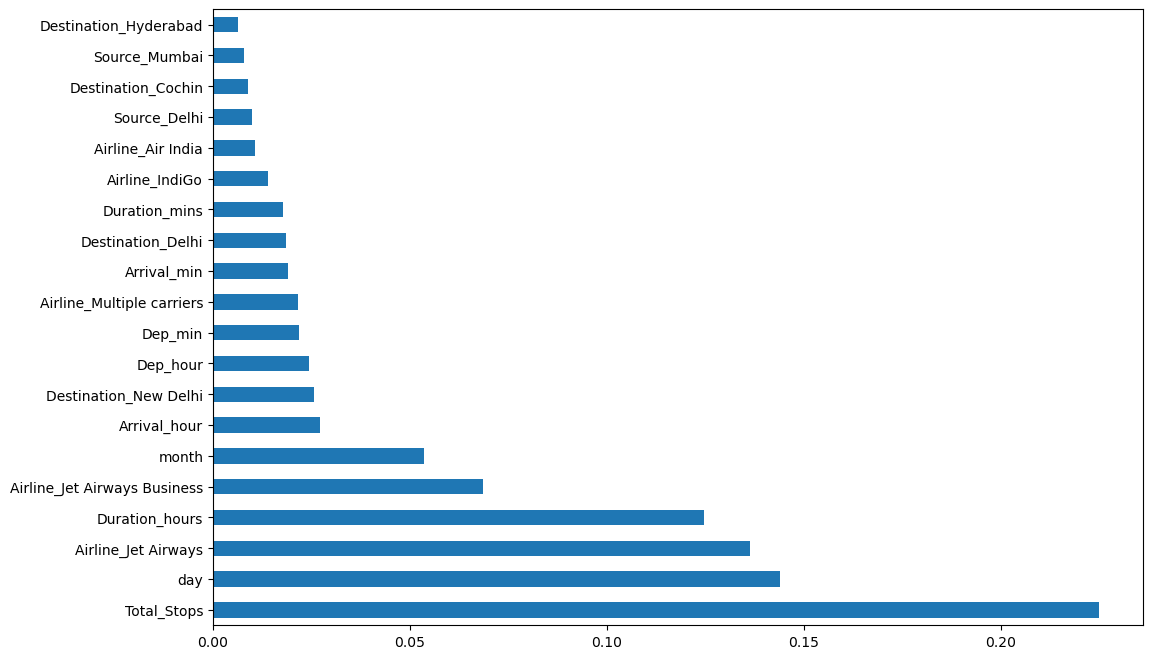

In [55]:
# plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.gaussian_process import GaussianProcessRegressor


from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from math import sqrt

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [58]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)
linear_rmse = sqrt(mean_squared_error(y_test, linear_predictions))
linear_r2 = r2_score(y_test, linear_predictions)
linear_cv_scores = cross_val_score(linear_model, X, y, cv=5, scoring='r2')

# Decision Tree
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_rmse = sqrt(mean_squared_error(y_test, dt_predictions))
dt_r2 = r2_score(y_test, dt_predictions)
dt_cv_scores = cross_val_score(dt_model, X, y, cv=5, scoring='r2')

# Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_rmse = sqrt(mean_squared_error(y_test, rf_predictions))
rf_r2 = r2_score(y_test, rf_predictions)
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')

# Support Vector Regression
svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_predictions = svr_model.predict(X_test)
svr_rmse = sqrt(mean_squared_error(y_test, svr_predictions))
svr_r2 = r2_score(y_test, svr_predictions)
svr_cv_scores = cross_val_score(svr_model, X, y, cv=5, scoring='r2')

# K-Nearest Neighbors
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
knn_rmse = sqrt(mean_squared_error(y_test, knn_predictions))
knn_r2 = r2_score(y_test, knn_predictions)
knn_cv_scores = cross_val_score(knn_model, X, y, cv=5, scoring='r2')

# Bagging
br_model = BaggingRegressor()
br_model.fit(X_train,y_train)
br_model.score(X_train,y_train)
br_predictions = br_model.predict(X_test)
br_rmse = sqrt(mean_squared_error(y_test,br_predictions))
br_r2 = r2_score(y_test,br_predictions)
br_cv_scores = cross_val_score(br_model, X, y, cv=5, scoring='r2')

# ExtratreesRegression
et_model = ExtraTreesRegressor()
et_model.fit(X_train,y_train)
et_model.score(X_train,y_train)
et_predictions = et_model.predict(X_test)
et_rmse = sqrt(mean_squared_error(y_test,et_predictions))
et_r2 = r2_score(y_test,et_predictions)
et_cv_scores = cross_val_score(et_model, X, y, cv=5, scoring='r2')

# Gaussian process Regression
gp_model = GaussianProcessRegressor()
gp_model.fit(X_train,y_train)
gp_model.score(X_train,y_train)
gp_predictions = gp_model.predict(X_test)
gp_rmse = sqrt(mean_squared_error(y_test,gp_predictions))
gp_r2 = r2_score(y_test,gp_predictions)
gp_cv_scores = cross_val_score(gp_model, X, y, cv=5, scoring='r2')

In [59]:
# GBR
gbr_model = GradientBoostingRegressor()
gbr_model.fit(X_train,y_train)
gbr_model.score(X_train,y_train)
gbr_predictions = gbr_model.predict(X_test)
gbr_rmse = sqrt(mean_squared_error(y_test,gbr_predictions))
gbr_r2 = r2_score(y_test,gbr_predictions)
print(gbr_model.score(X_train,y_train))

0.7917665173359445


In [60]:
# Adaboost
adb_model = AdaBoostRegressor()
adb_model.fit(X_train,y_train)
adb_model.score(X_train,y_train)
adb_predictions = adb_model.predict(X_test)
adb_rmse = sqrt(mean_squared_error(y_test,adb_predictions))
adb_r2 = r2_score(y_test,adb_predictions)
print(adb_model.score(X_train,y_train))

0.40862941339434544


In [61]:
# MLP Regressor
mlp_model = MLPRegressor()
mlp_model.fit(X_train,y_train)
mlp_model.score(X_train,y_train)
mlp_predictions = mlp_model.predict(X_test)
mlp_rmse = sqrt(mean_squared_error(y_test,mlp_predictions))
mlp_r2 = r2_score(y_test,mlp_predictions)
print(mlp_model.score(X_train,y_train))

0.43329247688845307


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Task 6:  Compare all of the models and justify your choice about the optimum model by using different evaluation technique and tune the models as per the requirement. 

In [65]:
# Bagging
br_model = BaggingRegressor()
br_model.fit(X_train,y_train)
br_model.score(X_train,y_train)
br_predictions = br_model.predict(X_test)
br_rmse = sqrt(mean_squared_error(y_test,br_predictions))
br_r2 = r2_score(y_test,br_predictions)
print(br_model.score(X_train,y_train))

0.9483924313283076


In [66]:
# ExtratreesRegression
et_model = ExtraTreesRegressor()
et_model.fit(X_train,y_train)
et_model.score(X_train,y_train)
et_predictions = et_model.predict(X_test)
et_rmse = sqrt(mean_squared_error(y_test,et_predictions))
et_r2 = r2_score(y_test,et_predictions)
print(et_model.score(X_train,y_train))

0.9697939909687786


#### Tuning Gaussian Process model

In [69]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [70]:
et_model = ExtraTreesRegressor()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Initialize GridSearchCV
grid_search = GridSearchCV(et_model, param_grid, scoring='r2', cv=5, verbose=1, n_jobs=-1)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_et_model = grid_search.best_estimator_

# Evaluate the best model on the test set
et_predictions = best_et_model.predict(X_test)
et_rmse = sqrt(mean_squared_error(y_test, et_predictions))
et_r2 = r2_score(y_test, et_predictions)
print("Best Model R2 Score on Test Set:", et_r2)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best Model R2 Score on Test Set: 0.8388010345132523


#### Tuning Random forest

In [71]:
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [72]:
y_pred = reg_rf.predict(X_test)

In [73]:
reg_rf.score(X_train, y_train)

0.9533446677001276

In [74]:
reg_rf.score(X_test, y_test)

0.8120027210526402

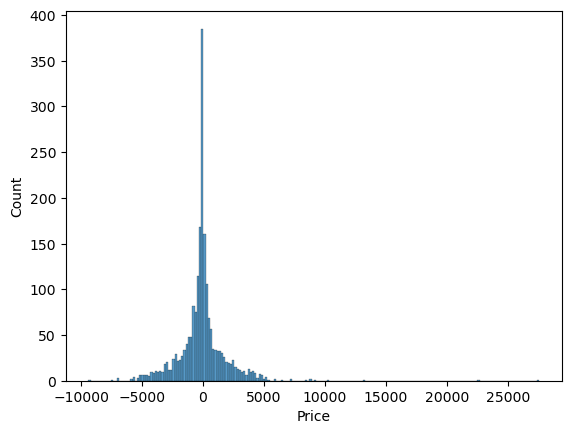

In [76]:
sns.histplot(y_test-y_pred)
plt.show()

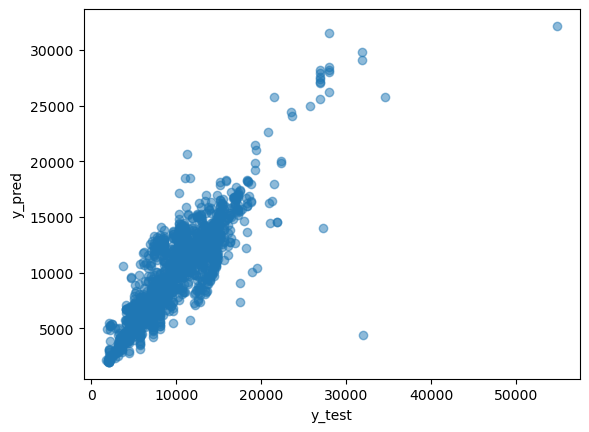

In [77]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [78]:
from sklearn import metrics

In [79]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1180.6522756044853
MSE: 3919795.2243471043
RMSE: 1979.8472729852433


In [80]:
metrics.r2_score(y_test, y_pred)

0.8120027210526402

In [81]:
from sklearn.model_selection import RandomizedSearchCV

In [82]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [83]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [84]:
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [85]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   3.3s


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   3.3s


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   3.3s


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   3.3s


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   3.3s


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   6.1s


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   6.0s


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   6.0s


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   5.7s


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   6.0s


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   8.7s


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   8.8s


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   8.9s


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   8.8s


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   8.8s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   7.8s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   7.8s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   8.3s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   7.8s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   7.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   2.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   2.6s
[CV] END max_depth=5, max_feat

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  10.6s


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  11.0s


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  10.7s


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  10.9s


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  11.1s


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [90]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [91]:
prediction = rf_random.predict(X_test)

C:\Users\Hp\AppData\Local\Temp\ipykernel_16968\375150797.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)


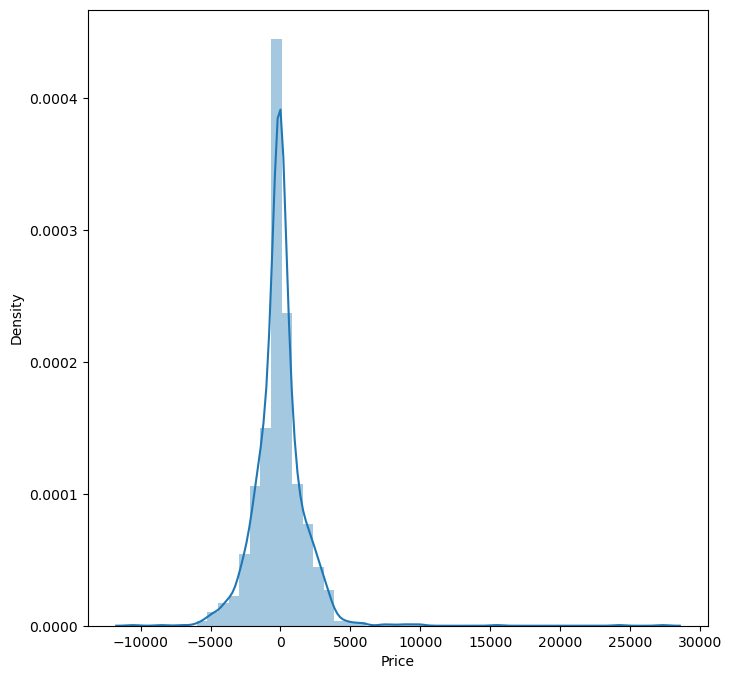

In [92]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

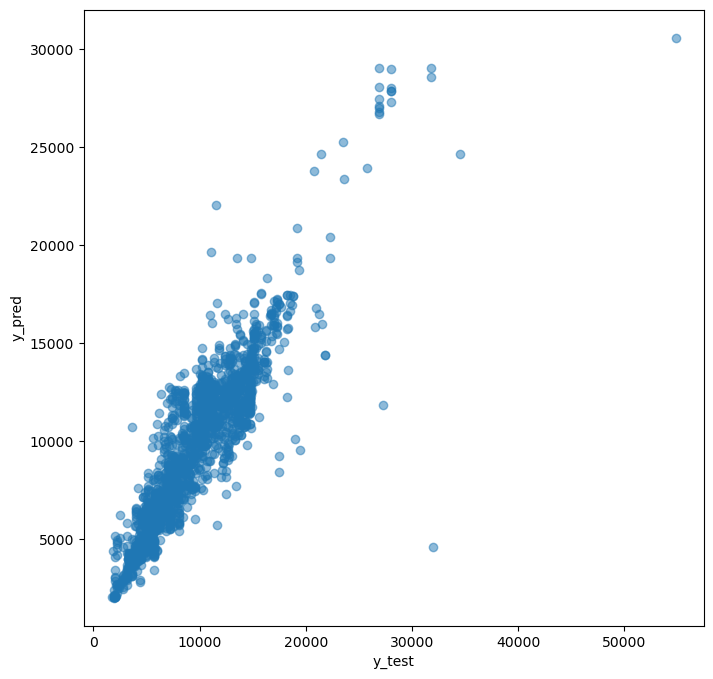

In [93]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [94]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1148.4291954404284
MSE: 3500179.7503335434
RMSE: 1870.8767330675594


## Task 7: Write a conclusion from the business point of view. Finally perform the same preprocessing technique for test data best practice using pipeline

In [104]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder
from sklearn.impute import SimpleImputer

# Function to extract date features
def extract_date_features(df):
    df["Journey_day"] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.day
    df["Journey_month"] = pd.to_datetime(df["Date_of_Journey"], format="%d/%m/%Y").dt.month
    df.drop(["Date_of_Journey"], axis=1, inplace=True)
    return df

# Function to extract time features
def extract_time_features(df, column):
    df["Dep_hour"] = pd.to_datetime(df[column]).dt.hour
    df["Dep_min"] = pd.to_datetime(df[column]).dt.minute
    df.drop([column], axis=1, inplace=True)
    return df

# Function to process duration
def process_duration(df, duration_column):
    duration = list(df[duration_column])

    for i in range(len(duration)):
        if len(duration[i].split()) != 2:
            if "h" in duration[i]:
                duration[i] = duration[i].strip() + " 0m"
            else:
                duration[i] = "0h " + duration[i]

    duration_hours = [int(d.split(sep="h")[0]) for d in duration]
    duration_mins = [int(d.split(sep="m")[0].split()[-1]) for d in duration]

    df["Duration_hours"] = duration_hours
    df["Duration_mins"] = duration_mins
    df.drop([duration_column], axis=1, inplace=True)
    return df

# Create pipeline for numerical features
numerical_features = ['Total_Stops']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

# Create pipeline for date features
date_features = ['Date_of_Journey']
date_transformer = FunctionTransformer(extract_date_features, validate=False)

# Create pipeline for time features
time_features = ['Dep_Time', 'Arrival_Time']
time_transformer = FunctionTransformer(extract_time_features, kw_args={'column': 'Dep_Time'}, validate=False)

# Create pipeline for duration processing
duration_feature = ['Duration']
duration_transformer = FunctionTransformer(process_duration, kw_args={'duration_column': 'Duration'}, validate=False)

# Create pipeline for categorical features
categorical_features = ['Airline', 'Source', 'Destination', 'Total_Stops']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))
])

# Create column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('date', date_transformer, date_features),
        ('time', time_transformer, time_features),
        ('duration', duration_transformer, duration_feature),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the final pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the data
df_test_transformed = pipeline.fit_transform(df_test)

# Display the transformed data
print("Shape of test data : ", df_test_transformed.shape)


Shape of test data :  (2671, 31)
